In [53]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras import optimizers
from keras.layers import TimeDistributed
from time import time
from keras.callbacks import TensorBoard

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [223]:
from numpy.random import RandomState
import pandas as pd
df = pd.read_csv(r'avsr_test_data_english_both_test_plus_train_v1.csv')
df = df.fillna(0)
rng = RandomState()
train = df.sample(frac=0.72, random_state=rng)
test = df.sample(frac=0.28, random_state=rng)

In [224]:
# from numpy.random import RandomState
# import pandas as pd
# df1 = pd.read_csv(r'./datasets_csv/avsr_test_data_eng_same_test_size_test_v2.csv')
# df1 = df1.fillna(0)
# #rng = RandomState()
# #train = df.sample(frac=0.7, random_state=rng)
# test = df1
# print(test.shape)

In [225]:
 train.shape

(531, 234)

In [226]:
train_audio = train
test_audio = test

In [227]:
Y_Train = train['label']

In [228]:
Y_Test  = test['label']

In [229]:
Y_Test

423    0
546    3
408    3
653    4
421    3
      ..
88     2
109    6
323    3
506    1
589    1
Name: label, Length: 206, dtype: int64

In [230]:
X_train = train.drop(['label'], axis=1)

In [231]:
for x in range(40,233):
    X_train = X_train.drop([str(x)], axis=1)

In [232]:
X_test = test.drop(['label'], axis=1)

In [233]:
for x in range(40,233):
    X_test = X_test.drop([str(x)], axis=1)

In [234]:
X_train_audio = train.drop(['label'], axis=1)

In [235]:
for x in range(0,40):
    X_train_audio = X_train_audio.drop([str(x)], axis=1)

In [236]:
X_test_audio = test.drop(['label'], axis=1)

In [237]:
for x in range(0,40):
    X_test_audio = X_test_audio.drop([str(x)], axis=1)

In [238]:
v = np.array(X_train)

In [239]:
v=v.reshape(531*8,5)

In [241]:
v = np.array(v)
v=v.reshape(531,8,5)

In [242]:
X_train = v

In [243]:
v = np.array(X_test)
v=v.reshape(206*8,5)
v = pd.DataFrame(v)
#v.drop(v.columns[[11,12,13,14]],axis=1,inplace=True)
X_test = np.array(X_test)
X_test=v
X_test.shape

(1648, 5)

In [244]:
X_train = np.array(X_train)
X_train = X_train.reshape(531*8,5)

In [245]:
X_test = np.array(X_test)
X_test=X_test.reshape(206*8,5)

In [246]:
X_train[0]

array([1.46099997, 1.79499996, 1.44000006, 0.92000002, 0.87199998])

In [247]:
dat_fi=np.array([])
for a in range(4248):
    for b in range(5):
        if b==0:
            first =  X_train[a][b]
        else:
            second = X_train[a][b]
            ec = first - second
            dat_fi = np.append(dat_fi,ec,axis=None)
            first =second
            
dat_fj = np.array([])
for c in range(1648):
    for b in range(5):
        if b==0:
            first =  X_test[c][b]
        else:
            second = X_test[c][b]
            ec = first - second
            dat_fj = np.append(dat_fj,ec,axis=None)
            first =second

In [248]:
X_train = dat_fi.reshape(531,8,4)
X_test = dat_fj.reshape(206,8,4)

In [249]:
Y_train = np.array(Y_Train)
Y_test = np.array(Y_Test)

In [250]:
X_train_audio = np.array(X_train_audio)
X_test_audio = np.array(X_test_audio)

In [251]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train)
Y_test = lb_make.fit_transform(Y_test)

In [252]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape


(531, 9)

In [279]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, BatchNormalization, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

input_audio = Input(shape=(193,1))
input_video = Input(shape=(8,4))

conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(input_audio)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
conv = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(conv)
conv = Flatten()(conv)
x = Dense(units=512, activation='relu')(conv)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x)
x1 = Dropout(0.3)(x1)
x1 = Dense(256, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(8, activation='relu')(x1)

y = LSTM(128,input_shape=(8,4),return_sequences=True,activation='relu')(input_video)

#y = Dense(512, activation='relu')(y)
y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y)
y1 = Dropout(0.3)(y1)
y1 = LSTM(256,activation='relu')(y1)
y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y1)
y1 = Dropout(0.275)(y1)
y1 = Dense(512, activation='relu')(y1)

#y = Model(inputs=input_video, outputs=y)
y = Flatten()(y)
combined = Concatenate()([x, y])
z1 = Dense(512, activation="relu")(combined)
z1 = Dropout(0.3)(z1)
z1 = Dense(1024, activation="relu")(z1)
z1 = Dropout(0.3)(z1)
z1 = Dense(256, activation="relu")(z1)
combined1 = Concatenate()([x1, y1,z1]) 


z = Dense(512, activation="relu")(combined1)
z = Dropout(0.5)(z)
z = Dense(1024, activation="relu")(z)
z = Dropout(0.5)(z)
z = Dense(256, activation="relu")(z)


z = Dense(9, activation='softmax')(z)
model = Model(inputs=[input_audio, input_video], outputs=z)
#model = Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 193, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 181, 8)       112         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 60, 8)        0           conv1d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 60, 8)        0           max_pooling1d[0][0]              
______________________________________________________________________________________________

In [280]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

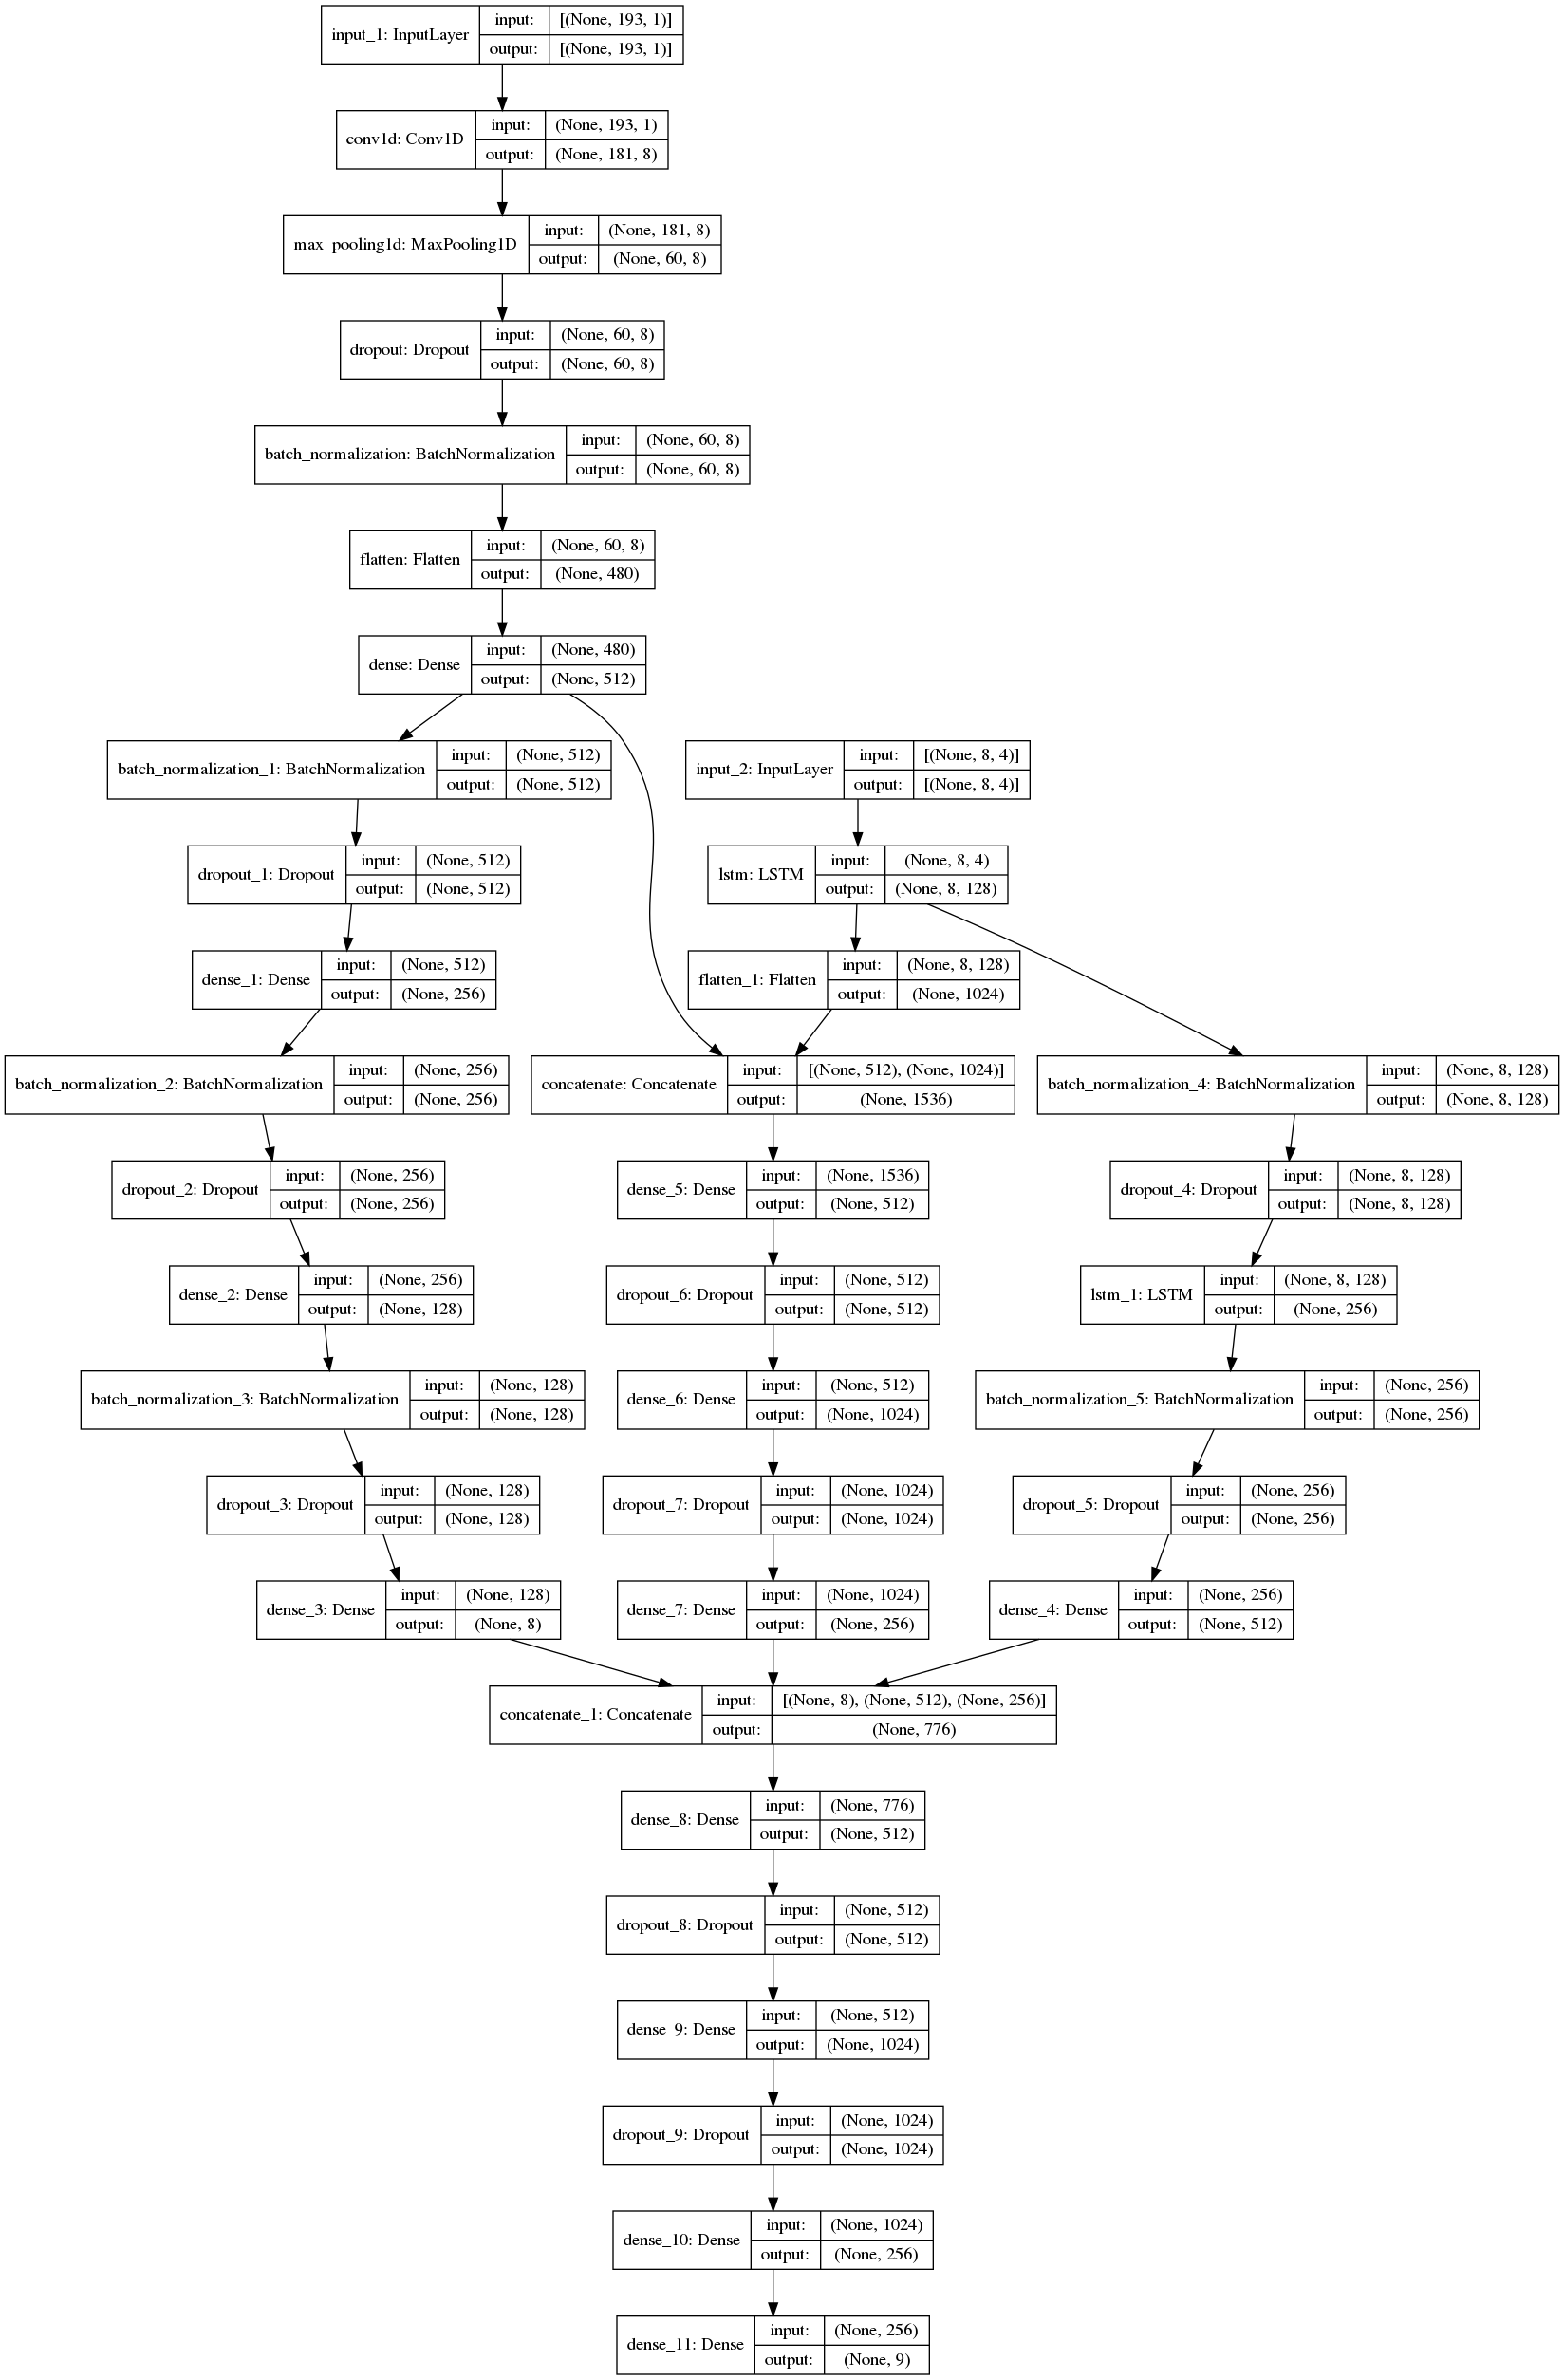

In [321]:
from keras.utils import plot_model
plot_model(model, to_file='AVSR_model_plot_eng.png', show_shapes=True, show_layer_names=True)

In [282]:
history = model.fit(x=[X_train_audio, X_train], y=Y_train, batch_size=32, epochs=100, verbose=1, validation_data=([X_test_audio,X_test],Y_test))

Epoch 1/100
17/17 [==============================] - 5s 111ms/step - loss: 2.3149 - accuracy: 0.1380 - val_loss: 2.2120 - val_accuracy: 0.0971
Epoch 2/100
17/17 [==============================] - 1s 66ms/step - loss: 2.1449 - accuracy: 0.2148 - val_loss: 2.2031 - val_accuracy: 0.1117
Epoch 3/100
17/17 [==============================] - 1s 67ms/step - loss: 2.1152 - accuracy: 0.2270 - val_loss: 2.1964 - val_accuracy: 0.1359
Epoch 4/100
17/17 [==============================] - 1s 67ms/step - loss: 2.0503 - accuracy: 0.2439 - val_loss: 2.1891 - val_accuracy: 0.0971
Epoch 5/100
17/17 [==============================] - 1s 68ms/step - loss: 1.9609 - accuracy: 0.2721 - val_loss: 2.1942 - val_accuracy: 0.0971
Epoch 6/100
17/17 [==============================] - 1s 69ms/step - loss: 1.8952 - accuracy: 0.2556 - val_loss: 2.1865 - val_accuracy: 0.1214
Epoch 7/100
17/17 [==============================] - 1s 77ms/step - loss: 1.9411 - accuracy: 0.2548 - val_loss: 2.1843 - val_accuracy: 0.1117
Epoch

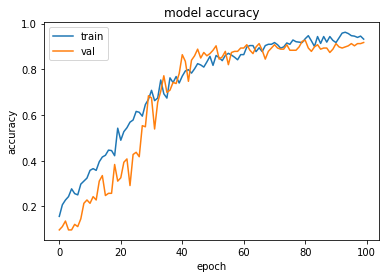

In [319]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('AVSR_English Model accuracy.jpg')
plt.show()

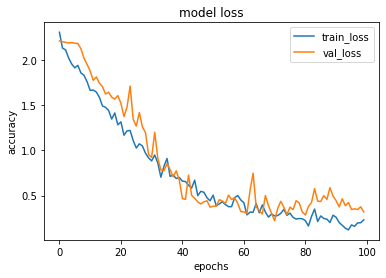

In [320]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.savefig('AVSR_English Model Loss.jpg')
plt.show()

In [285]:
predict_prob=model.predict([X_test_audio,X_test])
predict_classes=np.argmax(predict_prob,axis=1)
predict_classes
score, acc = model.evaluate([X_test_audio,X_test], Y_test)

7/7 [==============================] - 0s 16ms/step - loss: 0.3180 - accuracy: 0.9175


In [286]:
from sklearn.metrics import classification_report
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(Y_Test)
print(classification_report(Y_Test, y_pred, target_names=words_list))

              precision    recall  f1-score   support

       About       0.86      0.90      0.88        20
         Bad       0.91      1.00      0.95        20
      Bottle       0.95      0.88      0.91        24
        Come       0.92      0.92      0.92        24
         Cow       0.88      0.85      0.86        26
        Good       0.96      1.00      0.98        23
      Pencil       1.00      0.90      0.95        21
        Read       0.88      0.92      0.90        25
       Where       0.91      0.91      0.91        23

    accuracy                           0.92       206
   macro avg       0.92      0.92      0.92       206
weighted avg       0.92      0.92      0.92       206



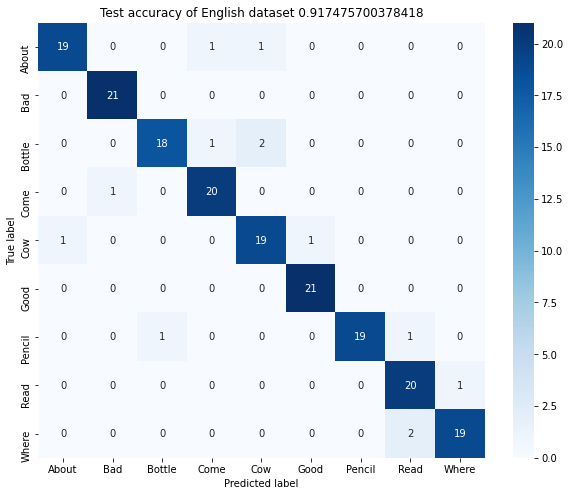

In [318]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
words_list = ['About','Bad','Bottle', 'Come','Cow', 'Good','Pencil', 'Read', 'Where']
lb = LabelEncoder()
y_pred1 = lb_make.fit_transform(y_pred1)
Y_Test1 = lb_make.fit_transform(Y_Test1)
cm = confusion_matrix(Y_Test1, y_pred1)
cm_df = pd.DataFrame(cm,index =words_list,columns = words_list)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Test accuracy of English dataset {}'.format(acc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('AVSR_English Confusion Matrix.jpg')
plt.show()

In [172]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_Test, y_pred, pos_label=1)
fnr = 1 - tpr
#eer_threshold = threshold(np.nanargmin(np.absolute((fnr - fpr))))
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.8711340206185567


In [416]:
model.save('avsr_english_v2.h5')#creates a HDF5 file 'my_model_name.h5'


In [323]:
import os
import numpy as np
import pandas as pd
import imutils
from imutils import face_utils
import dlib
import cv2
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

SHAPE_PREDICTOR_LOCATION = "./shape_predictor_68_face_landmarks.dat"

face_detector = dlib.get_frontal_face_detector()
shape_predictor = dlib.shape_predictor(SHAPE_PREDICTOR_LOCATION)

X  = []
Y  = []
label_dictionary = dict()



def process_Video(video):
    print("================================")
    X = []
    Y = []
    cap = cv2.VideoCapture(video)
    fps = cap.get(cv2.CAP_PROP_FPS)
    print("FPS : " + str(fps))
    if(not cap.isOpened()):
        print(" .....Cannot open video stream or file!.....")
    print(" video/camera opened...")
    print("********************************************")
    while(cap.isOpened()):
        frameId = cap.get(1)
        try:
            ret, image = cap.read()
            if(ret==False):
                break
            else:
                print("Frame ID :"+ str(frameId))
                #image = imutils.rotate_bound(image,angle=90)
                #image = imutils.resize(image,width = 500)
                gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                #cv2.imshow("gray",image)
                faces = face_detector(gray_image,1)
                for (i,rect) in enumerate(faces):
                    shape = shape_predictor(gray_image,rect)
                    shape = face_utils.shape_to_np(shape)

                    for (name, (i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
                        if(name=='mouth'):
                            #cpyImage = image.copy()
                            X_frame = []
                            Y_frame = []
                            for (x,y) in   shape[i:j]:
                                X_frame.append(x)
                                Y_frame.append(y)
                    X.append(X_frame)
                    Y.append(Y_frame)

                    print("================================================")

        except Exception as e:
            print("ERROR OCCURED......." + e)
            break;
    cap.release()
    cv2.destroyAllWindows()
    return X,Y

def process_Arrays(X,Y):
    X_sd_array = []
    Y_sd_array = []
    X_sd_array = np.std(X,axis = 0).astype('float32')
    Y_sd_array = np.std(Y,axis = 0).astype('float32')
    return X_sd_array,Y_sd_array


def process(training_Dataframe,video):
    X,Y = process_Video(video)
    X,Y = process_Arrays(X,Y)
    feature_vector = np.r_[X,Y]
    return feature_vector




In [496]:
filetotest = "/media/vinay/Academy/Final_year_project/Rohith_English_mp4_1sec/traincome46.mp4"
training_Dataframe = pd.DataFrame(dtype='float32')
training_Dataframe = process(training_Dataframe,filetotest)
#training_Dataframe = training_Dataframe.sample(frac=1).reset_index(drop=True)
print(training_Dataframe)

FPS : 30.0
 video/camera opened...
********************************************
Frame ID :0.0
Frame ID :1.0
Frame ID :2.0
Frame ID :3.0
Frame ID :4.0
Frame ID :5.0
Frame ID :6.0
Frame ID :7.0
Frame ID :8.0
Frame ID :9.0
Frame ID :10.0
Frame ID :11.0
Frame ID :12.0
Frame ID :13.0
Frame ID :14.0
Frame ID :15.0
Frame ID :16.0
Frame ID :17.0
Frame ID :18.0
Frame ID :19.0
Frame ID :20.0
Frame ID :21.0
Frame ID :22.0
Frame ID :23.0
Frame ID :24.0
Frame ID :25.0
Frame ID :26.0
Frame ID :27.0
Frame ID :28.0
Frame ID :29.0
[0.9660918  1.5        1.4067298  0.91954094 1.203698   1.5986105
 1.4236104  1.6124516  1.0241528  0.8055364  1.3988091  1.6653328
 0.77172244 1.2364825  0.8595865  1.1254629  1.5293427  1.097978
 0.88443327 1.1930354  1.3828312  0.4818944  0.6992059  0.6574361
 0.7272475  0.6191392  1.468181   3.5364766  4.475737   4.7604856
 4.7        3.7712362  1.431394   0.9480975  1.0198039  1.0624918
 1.5073892  3.3539364  3.311428   3.4441576 ]


In [497]:
X_Predict = np.array(training_Dataframe)
X_Predict = X_Predict.reshape(1*8,5)
dat_fi1=np.array([])
for a in range(8):
    for b in range(5):
        if b==0:
            first1 =  X_Predict[a][b]
        else:
            second1 = X_Predict[a][b]
            ec1 = first1 - second1
            dat_fi1 = np.append(dat_fi1,ec1,axis=None)
            first1 =second1

In [498]:
X_Predict = dat_fi1.reshape(1,8,4)

In [503]:
AUDIO_FILE_NAME='./teste11.wav'
############Helper Functions##############
from moviepy import editor
###Helper funtion to convert vedio to audio###
def convert_vedio_to_audio(video):
    try:
        os.system('ffmpeg -i {} -acodec pcm_s16le -ar 16000 {}'.format(filetotest, AUDIO_FILE_NAME))
        return True,AUDIO_FILE_NAME
    except Exception as e:
       print(e)
       print("conversion from video to audio failed ")
    return False,AUDIO_FILE_NAME
    
###Helper Function to extract features###
def extract_feature(audio_file_name):
    X, sample_rate = librosa.load(audio_file_name,sr = 16000)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    return mfccs,chroma,mel,contrast,tonnetz
 
###Helper Function to create a single vector of features###
def process_audio_features(mfccs,chroma,mel,contrast,tonnetz):   

        features_array = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        return features_array
    
########## Call this function to get Audio features#################
def get_audio_feature_vector(video_location):
    isConverted,audio_file_name = convert_vedio_to_audio(video_location)
    if(isConverted):
         mfccs,chroma,mel,contrast,tonnetz =  extract_feature(audio_file_name)
         feature_vector = process_audio_features(mfccs,chroma,mel,contrast,tonnetz)
         feature_vector  = np.around(feature_vector,decimals=3)
         return feature_vector
    else:
       print('Video conversion failed...')

In [504]:
X_Predict_Audio = get_audio_feature_vector(filetotest)

In [505]:
X_Predict_Audio.reshape(1,193,)

array([[-5.34537e+02,  1.21432e+02,  2.74330e+01,  1.05670e+01,
         7.87400e+00,  1.00110e+01,  4.81500e+00, -1.58700e+00,
        -3.94800e+00,  5.53800e+00,  2.25400e+00, -6.04000e-01,
        -5.39500e+00, -1.60700e+00, -8.63200e+00,  2.49000e-01,
        -5.18300e+00, -2.11500e+00, -4.42300e+00,  9.71000e-01,
        -5.76800e+00, -2.01700e+00,  8.10000e-02,  9.30000e-01,
         1.51600e+00, -9.49000e-01, -6.32100e+00, -2.00600e+00,
        -7.39000e-01,  1.14100e+00, -2.01700e+00, -1.65000e+00,
        -2.58800e+00,  1.41000e-01, -2.45800e+00, -1.62500e+00,
        -3.40000e+00, -1.25400e+00, -2.12000e-01,  1.30700e+00,
         6.88000e-01,  7.22000e-01,  8.28000e-01,  6.95000e-01,
         6.63000e-01,  6.46000e-01,  6.92000e-01,  6.13000e-01,
         6.18000e-01,  6.64000e-01,  6.41000e-01,  6.62000e-01,
         3.40000e-02,  4.00000e-03,  7.00000e-03,  1.00000e-02,
         6.60000e-02,  3.28000e-01,  1.69000e-01,  1.30000e-02,
         8.00000e-03,  1.10000e-02,  2.2

In [506]:
predict_prob=model.predict([X_Predict_Audio.reshape(1,193,),X_Predict.reshape(1,8,4)])
index=np.argmax(predict_prob[0])
print(index)
print(words_list[index])
predict_prob

3
Come


array([[3.2064319e-05, 1.0657740e-02, 8.8917204e-06, 9.8927581e-01,
        1.3360878e-05, 3.2798664e-07, 6.7463675e-06, 1.8236249e-06,
        3.1956083e-06]], dtype=float32)